# Competiton : Binary Prediction with a Rainfall Dataset

## URL : https://www.kaggle.com/competitions/playground-series-s5e4

## EDA is on the way

# Importing Libraries

In [1]:
# table manipulation, calculating
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100) # increase the maximum number of columns

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore all warnings
import warnings
warnings.simplefilter("ignore")

# Importing Datasets

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')

Column list

    id　　　　　　　　　　　　　 : Unique identifier for each episode.    
    Podcast_Name　　        　 : The name of the podcast show.
    Episode_Title 　　　　　　  : The title of the individual episode.
    Episode_Length_minutes     : The duration (length) of the episode in minutes.
    Genre                      : The genre of the podcast.
    
    Host_Popularity_percentage : The popularity of the podcast host(s) expressed as a percentage. This could reflect listener ratings or follower counts.
    Publication_Day            : The day of the week the episode was published.
    Publication_Time           : The time the episode was published.
    Guest_Popularity_percentage: If the episode has a guest, their popularity expressed as a percentage.
    
    Number_of_Ads              : The number of advertisements included in the episode.
    Episode_Sentiment          : The overall emotional sentiment of the episode.
    Listening_Time_minutes     : The amount of time (in minutes) a listener actually spent listening to the episode.

In [3]:
df_train

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [4]:
df_test

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3.0,Positive


In [5]:
# Display missing rows
df_train_nan_index = df_train[df_train.isnull().any(axis=1)].index # Save the index of the row that contains the missing value
df_train_nan_rows = df_train.loc[df_train_nan_index] # Recall the row later using the index
display(df_train_nan_index)
display(df_train_nan_rows)

Index([     0,      5,      8,      9,     16,     20,     21,     26,     29,
           32,
       ...
       749968, 749969, 749981, 749984, 749985, 749989, 749991, 749994, 749995,
       749996],
      dtype='int64', length=210952)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
5,5,Fitness First,Episode 19,26.54,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047
8,8,Daily Digest,Episode 32,105.87,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761
16,16,Study Sessions,Episode 82,78.47,Education,48.84,Sunday,Afternoon,NaN,2.0,Neutral,42.89441
...,...,...,...,...,...,...,...,...,...,...,...,...
749989,749989,Home & Living,Episode 78,97.51,Lifestyle,91.92,Wednesday,Evening,NaN,3.0,Neutral,56.44464
749991,749991,Business Insights,Episode 5,62.46,Business,30.03,Tuesday,Afternoon,NaN,0.0,Positive,53.32434
749994,749994,Laugh Line,Episode 67,8.93,Comedy,85.52,Saturday,Evening,NaN,1.0,Neutral,7.39878
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058


In [6]:
# Display missing rows
df_test_nan_index = df_test[df_test.isnull().any(axis=1)].index # Save the index of the row that contains the missing value
df_test_nan_rows = df_test.loc[df_test_nan_index] # Recall the row later using the index
display(df_test_nan_index)
display(df_test_nan_rows)

Index([     1,      5,      9,     12,     13,     16,     19,     25,     26,
           28,
       ...
       249968, 249971, 249972, 249976, 249979, 249982, 249984, 249986, 249989,
       249992],
      dtype='int64', length=70166)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
5,750005,Money Matters,Episode 43,34.44,Business,77.18,Sunday,Night,NaN,0.0,Neutral
9,750009,True Crime Stories,Episode 76,100.65,True Crime,27.66,Tuesday,Evening,NaN,1.0,Negative
12,750012,Crime Chronicles,Episode 30,49.86,True Crime,57.37,Saturday,Morning,NaN,2.0,Negative
13,750013,Innovators,Episode 83,NaN,Technology,87.76,Tuesday,Morning,NaN,1.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...
249982,999982,Tech Talks,Episode 48,NaN,Technology,67.27,Wednesday,Evening,41.26,0.0,Positive
249984,999984,Tech Trends,Episode 66,96.02,Technology,91.56,Tuesday,Morning,NaN,1.0,Positive
249986,999986,World Watch,Episode 91,44.26,News,94.86,Tuesday,Afternoon,NaN,1.0,Positive
249989,999989,Educational Nuggets,Episode 2,53.34,Education,60.16,Monday,Evening,NaN,1.0,Negative


# EDA

## Whole

## Data Inspection

In [7]:
# Check if each column has a unique value of 0 or 1, and assign 1 or 0
def unique_to_binary(column):
    unique_values = column.unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        return 1
    else:
        return 0

def find_outliers(df):
    outliers_rate_dict = {}

    for column_name in df.columns:
        column = df[column_name]

        # Skip if not a numeric column
        if not pd.api.types.is_numeric_dtype(column):
            print(f"'{column_name}' is skipped because it is not a numeric type.")
            continue

        # Calculate the mean and standard deviation of the data
        mean = column.mean()
        std = column.std()

        # Set outlier threshold
        threshold = 2  # Adjust this value to change the outlier criteria

        # Set conditions for detecting outliers
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std

        # Detect outliers
        outliers = (column < lower_bound) | (column > upper_bound)

        # Calculate the percentage of outliers
        outliers_rate = outliers.sum() / len(column)

        # Save results to dictionary
        outliers_rate_dict[column_name] = outliers_rate

    return outliers_rate_dict


In [8]:
def create_data_inspection(df):
    """A function that generates data inspection information for a data frame"""

    # process:1
    data_inspection = pd.DataFrame({
        'column_name': df.columns,
        'data_type': df.dtypes,
        'num_of_rows': len(df),
        'num_of_uniques': df.nunique(),
        'num_of_duplicated_rows': len(df) - df.nunique(),
        'non-null_cnt': df.count().values,
        'null_cnt': df.isnull().sum(),
        'null_rate': (df.isnull().sum() / len(df)),
    })

    # process:2
    description = df.describe(include=np.number).T.reset_index().rename(columns={'index': 'column_name'})
    median = df.median(numeric_only=True).reset_index().rename(columns={'index': 'column_name', 0: 'median'})

    # Calculate the most frequent value for each column
    mode_values = {}
    for column in df.columns:
        try:
            mode_values[column] = df[column].mode().iloc[0]
        except IndexError:
            mode_values[column] = None  # Handle cases with no mode

    # Calculate the percentage of most frequent values
    mode_ratios = {}
    for column in df.columns:
        if column in mode_values and mode_values[column] is not None:
            mode_value = mode_values[column]
            mode_ratio = (df[column] == mode_value).sum() / len(df)
            mode_ratios[column] = mode_ratio
        else:
            mode_ratios[column] = None

    # Convert the most common value and its percentage into a data frame
    mode_df = pd.DataFrame(list(mode_values.items()), columns=['column_name', 'mode'])
    mode_df['rate mode'] = mode_df['column_name'].map(mode_ratios)

    # ★ Custom statistics calculation without using df.describe for basic stats
    def calculate_custom_stats(series):
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        return pd.Series({
            'count': series.count(),
            'mean': series.mean(),
            'std': series.std(),
            # 'q1-1.5*QTR': q1 - 1.5 * iqr,
            '0%': series.quantile(0),
            '25%': q1,
            '50%': series.median(),
            '75%': q3,
            '100%': series.quantile(1),
            'lower_bound': series.mean() - 2 * series.std(),
            'upper_bound': series.mean() + 2 * series.std()
            # 'q3+1.5*QTR': q3 + 1.5 * iqr
        })

    numeric_df = df.select_dtypes(include=np.number)
    custom_description = numeric_df.apply(calculate_custom_stats).T.reset_index(names='column_name')

    # process:3
    data_inspection = pd.merge(data_inspection, custom_description, how='left', on='column_name')
    data_inspection = pd.merge(data_inspection, mode_df, how='left', on='column_name')

    # The 'description' merge is no longer needed as 'custom_description' provides the stats
    # data_inspection = pd.merge(data_inspection, description, how='left', on='column_name')

    outliers_rate = find_outliers(df)
    outliers_rate = pd.DataFrame(list(outliers_rate.items()), columns=['column_name', 'outliers_rate']).reset_index(drop=True)
    data_inspection = pd.merge(data_inspection, outliers_rate, how='left', on='column_name')

    # ★Add new criteria
    skew = df.select_dtypes(include=np.number).skew().reset_index().rename(columns={'index': 'column_name', 0: 'skewness'})
    kurt = df.select_dtypes(include=np.number).kurt().reset_index().rename(columns={'index': 'column_name', 0: 'kurtosis'})

    data_inspection = pd.merge(data_inspection, skew, how='left', on='column_name')
    data_inspection = pd.merge(data_inspection, kurt, how='left', on='column_name')

    # ★Add new criteria
    # Calculating correlation coefficients (numeric columns only), where errors may occur.
    numeric_df = df.select_dtypes(include=np.number)
    if not numeric_df.empty and numeric_df.shape[1] > 1:
        try:
            correlation_matrix = numeric_df.corr(numeric_only=True)
            # Assuming the last column is the target variable for correlation
            target_column = numeric_df.columns[-1]
            if target_column in correlation_matrix.index:
                target_corr = pd.DataFrame({'column_name': correlation_matrix.index, 'target correlation': correlation_matrix[target_column]})
                data_inspection = pd.merge(data_inspection, target_corr, how='left', on='column_name')
            else:
                data_inspection['target correlation'] = np.nan
        except Exception as e:
            print(f"Error calculating correlation: {e}")
            data_inspection['target correlation'] = np.nan
    else:
        data_inspection['target correlation'] = np.nan

    # process:4
    data_inspection_else = pd.DataFrame({
        'column_name': df.columns,
        'flag_or_not': df.apply(unique_to_binary),
        'columns_details': None,
        'remarks': None,
        'trigger': None,
        'dataset_name': None,
        'existence_of_table_definition': None,
        'data_exmaple': df.head(1).T.iloc[:, 0].astype(str).replace('\n', '<br>')
    })

    data_inspection = pd.merge(data_inspection, data_inspection_else, how='left', on='column_name')

    # visualization `data_inspection`
    # blue → green → yellow
    styled_columns = data_inspection.select_dtypes(include=np.number).columns
    if not styled_columns.empty:
        data_inspection_styled = data_inspection.style.background_gradient(cmap='viridis', subset=pd.IndexSlice[:, styled_columns])
    else:
        data_inspection_styled = data_inspection

    return data_inspection_styled

### df_train

In [9]:
df_train_tmp = df_train.drop('id', axis=1)
data_inspection_styled = create_data_inspection(df_train_tmp)
display(data_inspection_styled)
# data_inspection.to_csv('data_inspection.csv', index = 'false')

'Podcast_Name' is skipped because it is not a numeric type.
'Episode_Title' is skipped because it is not a numeric type.
'Genre' is skipped because it is not a numeric type.
'Publication_Day' is skipped because it is not a numeric type.
'Publication_Time' is skipped because it is not a numeric type.
'Episode_Sentiment' is skipped because it is not a numeric type.


,column_name,data_type,num_of_rows,num_of_uniques,num_of_duplicated_rows,non-null_cnt,null_cnt,null_rate,count,mean,std,0%,25%,50%,75%,100%,lower_bound,upper_bound,mode,rate mode,outliers_rate,skewness,kurtosis,target correlation,flag_or_not,columns_details,remarks,trigger,dataset_name,existence_of_table_definition,data_exmaple
0,Podcast_Name,object,750000,48,749952,750000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Tech Talks,0.030463,nan,nan,nan,nan,0,None,None,None,None,None,Mystery Matters
1,Episode_Title,object,750000,100,749900,750000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Episode 71,0.014020,nan,nan,nan,nan,0,None,None,None,None,None,Episode 98
2,Episode_Length_minutes,float64,750000,12268,737732,662907,87093,0.116124,662907.000000,64.504738,32.969603,0.000000,35.730000,63.840000,94.070000,325.240000,-1.434468,130.443945,6.600000,0.001233,0.000001,-0.002006,-1.203033,0.916749,0,None,None,None,None,None,nan
3,Genre,object,750000,10,749990,750000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Sports,0.116808,nan,nan,nan,nan,0,None,None,None,None,None,True Crime
4,Host_Popularity_percentage,float64,750000,8038,741962,750000,0,0.000000,750000.000000,59.859901,22.873098,1.300000,39.410000,60.050000,79.530000,119.460000,14.113706,105.606096,38.680000,0.000747,0.000037,0.004926,-1.206702,0.050870,0,None,None,None,None,None,74.81
5,Publication_Day,object,750000,7,749993,750000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Sunday,0.154595,nan,nan,nan,nan,0,None,None,None,None,None,Thursday
6,Publication_Time,object,750000,4,749996,750000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Night,0.262465,nan,nan,nan,nan,0,None,None,None,None,None,Night
7,Guest_Popularity_percentage,float64,750000,10019,739981,603970,146030,0.194707,603970.000000,52.236449,28.451241,0.000000,28.380000,53.580000,76.600000,119.910000,-4.666034,109.138932,68.530000,0.000504,0.000012,-0.107035,-1.150117,-0.016014,0,None,None,None,None,None,nan
8,Number_of_Ads,float64,750000,12,749988,749999,1,0.000001,749999.000000,1.348855,1.151130,0.000000,0.000000,1.000000,2.000000,103.910000,-0.953406,3.651116,0.000000,0.290123,0.000012,6.032992,505.893908,-0.118337,0,None,None,None,None,None,0.0
9,Episode_Sentiment,object,750000,3,749997,750000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Neutral,0.335055,nan,nan,nan,nan,0,None,None,None,None,None,Positive


### df_test

In [10]:
df_test_tmp = df_test.drop('id', axis=1)
data_inspection_styled = create_data_inspection(df_test_tmp)
display(data_inspection_styled)
# data_inspection.to_csv('data_inspection.csv', index = 'false')

'Podcast_Name' is skipped because it is not a numeric type.
'Episode_Title' is skipped because it is not a numeric type.
'Genre' is skipped because it is not a numeric type.
'Publication_Day' is skipped because it is not a numeric type.
'Publication_Time' is skipped because it is not a numeric type.
'Episode_Sentiment' is skipped because it is not a numeric type.


,column_name,data_type,num_of_rows,num_of_uniques,num_of_duplicated_rows,non-null_cnt,null_cnt,null_rate,count,mean,std,0%,25%,50%,75%,100%,lower_bound,upper_bound,mode,rate mode,outliers_rate,skewness,kurtosis,target correlation,flag_or_not,columns_details,remarks,trigger,dataset_name,existence_of_table_definition,data_exmaple
0,Podcast_Name,object,250000,48,249952,250000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Tech Talks,0.030212,nan,nan,nan,nan,0,None,None,None,None,None,Educational Nuggets
1,Episode_Title,object,250000,100,249900,250000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Episode 71,0.013968,nan,nan,nan,nan,0,None,None,None,None,None,Episode 73
2,Episode_Length_minutes,float64,250000,11631,238369,221264,28736,0.114944,221264.000000,419.298741,166854.502468,2.470000,35.780000,63.970000,94.150000,78486264.000000,-333289.706196,334128.303678,6.600000,0.001236,0.000004,470.387041,221263.978687,-0.000641,0,None,None,None,None,None,78.96
3,Genre,object,250000,10,249990,250000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Sports,0.115612,nan,nan,nan,nan,0,None,None,None,None,None,Education
4,Host_Popularity_percentage,float64,250000,8010,241990,250000,0,0.000000,250000.000000,59.716491,22.880028,2.490000,39.250000,59.900000,79.390000,117.760000,13.956436,105.476546,26.720000,0.000712,0.000028,0.011750,-1.206241,-0.003652,0,None,None,None,None,None,38.11
5,Publication_Day,object,250000,7,249993,250000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Sunday,0.155624,nan,nan,nan,nan,0,None,None,None,None,None,Saturday
6,Publication_Time,object,250000,4,249996,250000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Night,0.261760,nan,nan,nan,nan,0,None,None,None,None,None,Evening
7,Guest_Popularity_percentage,float64,250000,9961,240039,201168,48832,0.195328,201168.000000,52.192796,28.445034,0.000000,28.320000,53.360000,76.560000,116.820000,-4.697272,109.082865,68.530000,0.000544,0.000016,-0.104559,-1.150736,0.000936,0,None,None,None,None,None,53.33
8,Number_of_Ads,float64,250000,6,249994,250000,0,0.000000,250000.000000,1.355852,4.274399,0.000000,0.000000,1.000000,2.000000,2063.000000,-7.192945,9.904650,0.000000,0.291452,0.000008,448.867463,216482.282069,1.000000,0,None,None,None,None,None,1.0
9,Episode_Sentiment,object,250000,3,249997,250000,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Neutral,0.334684,nan,nan,nan,nan,0,None,None,None,None,None,Neutral


### Visualizing missing values

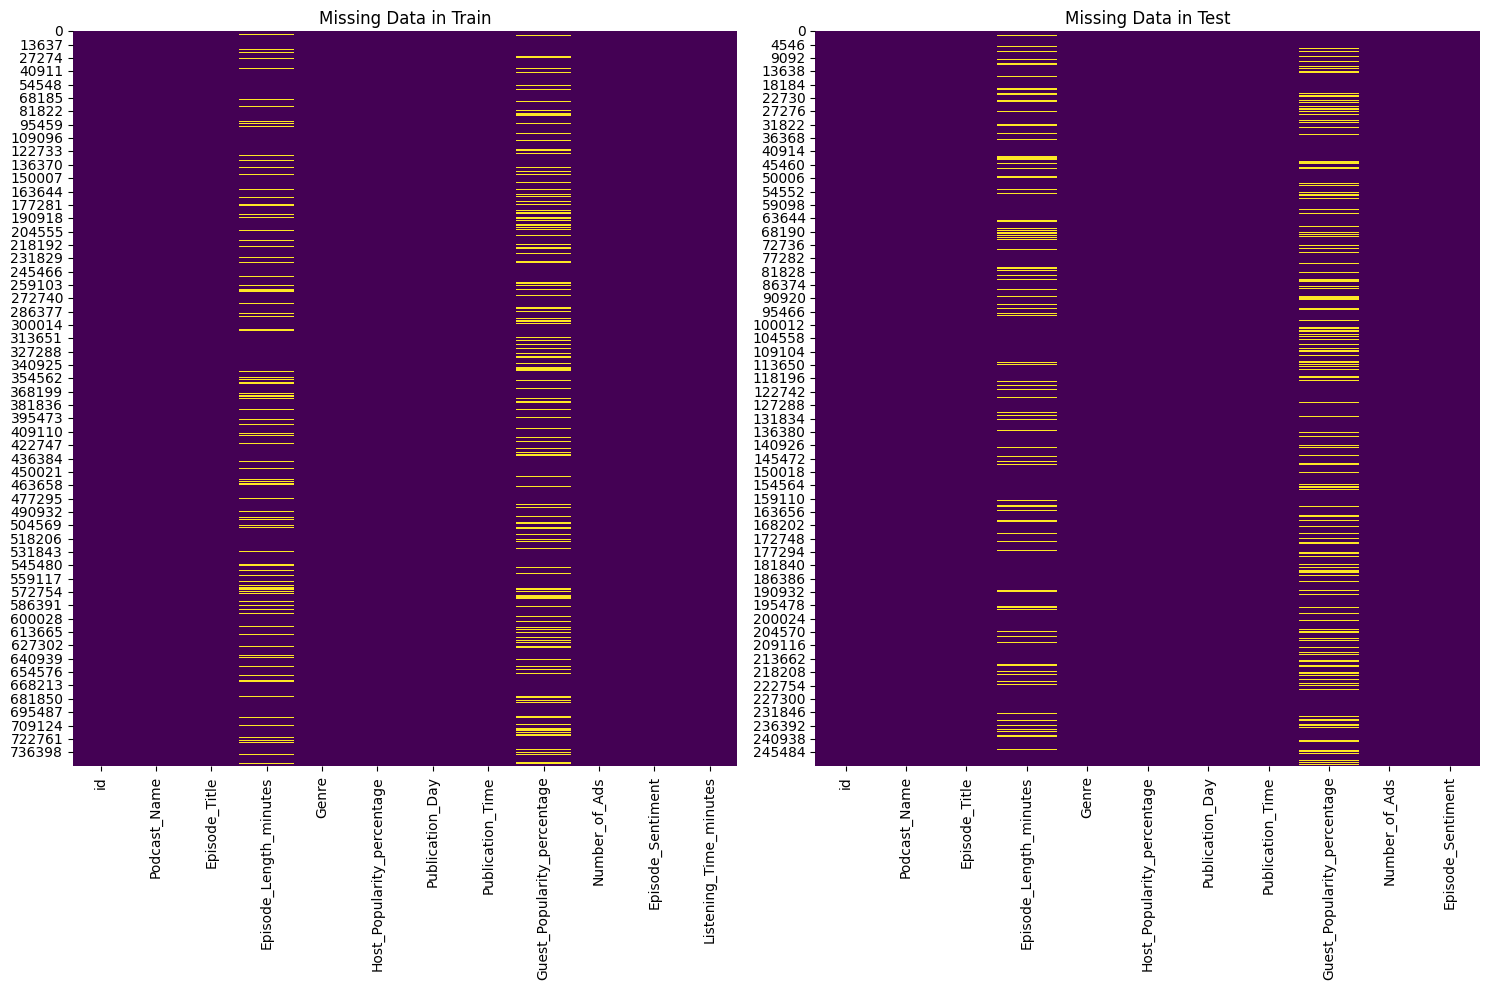

In [11]:
# Create a 1-by-2 subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Missing value heatmap of training data
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Data in Train')

# Missing value heatmap for test data
sns.heatmap(df_test.isnull(), cbar=False, cmap='viridis', ax=axes[1])
axes[1].set_title('Missing Data in Test')

# Adjust layout
plt.tight_layout()
plt.show()

# Univariate

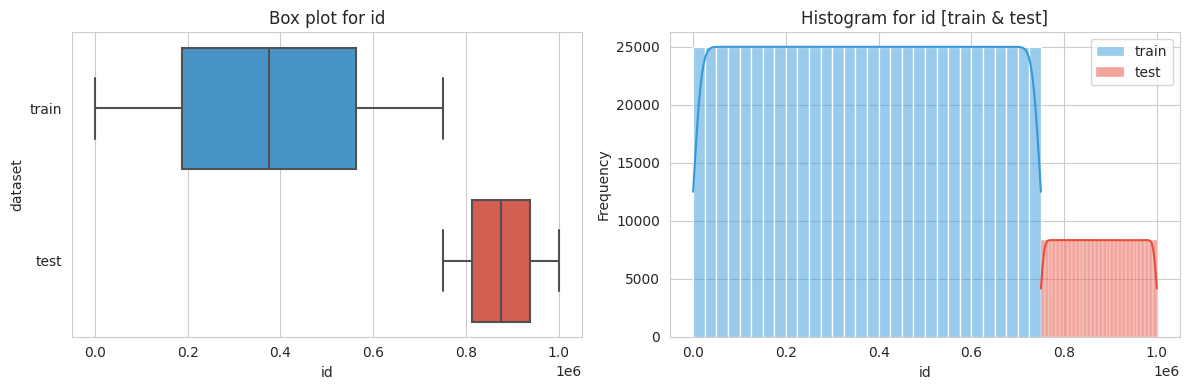

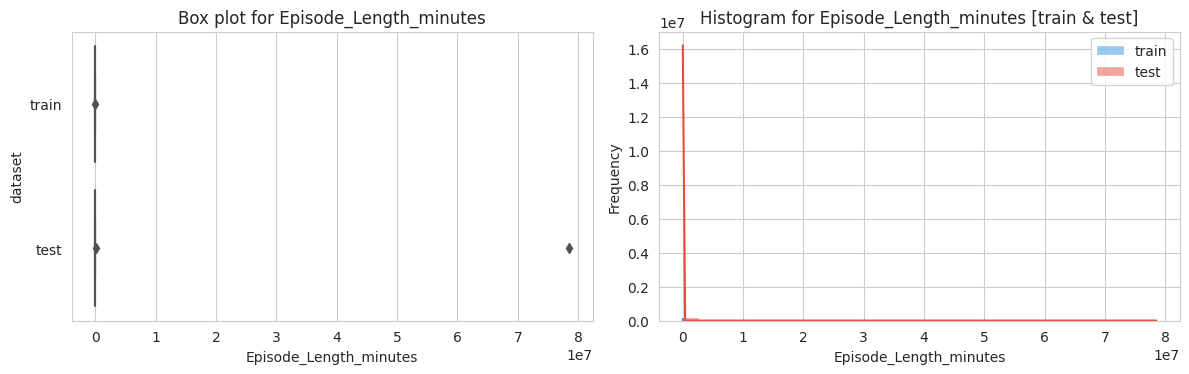

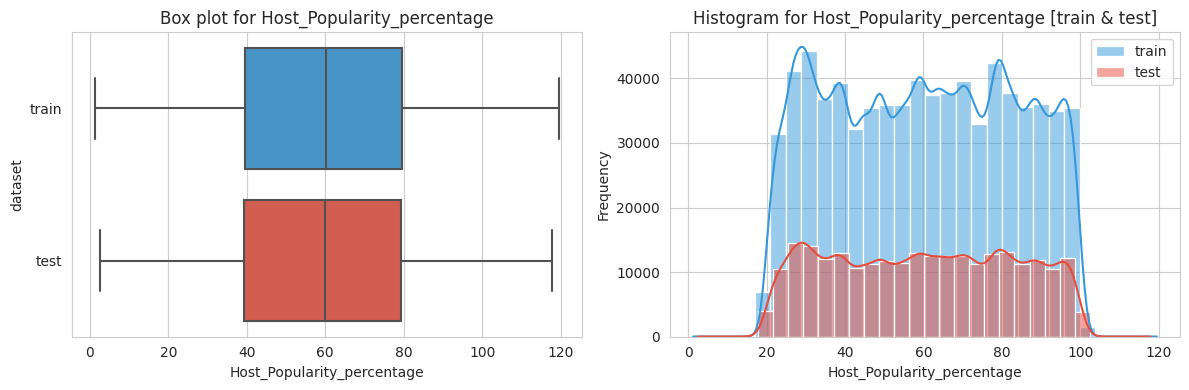

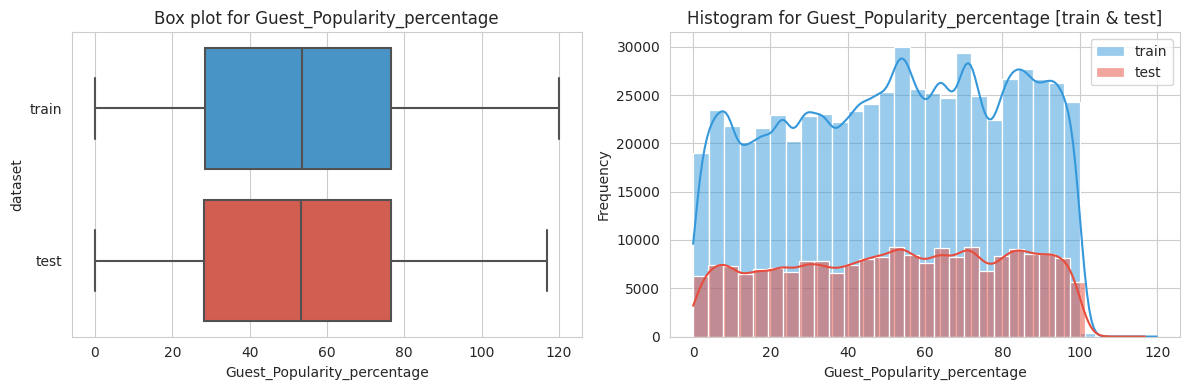

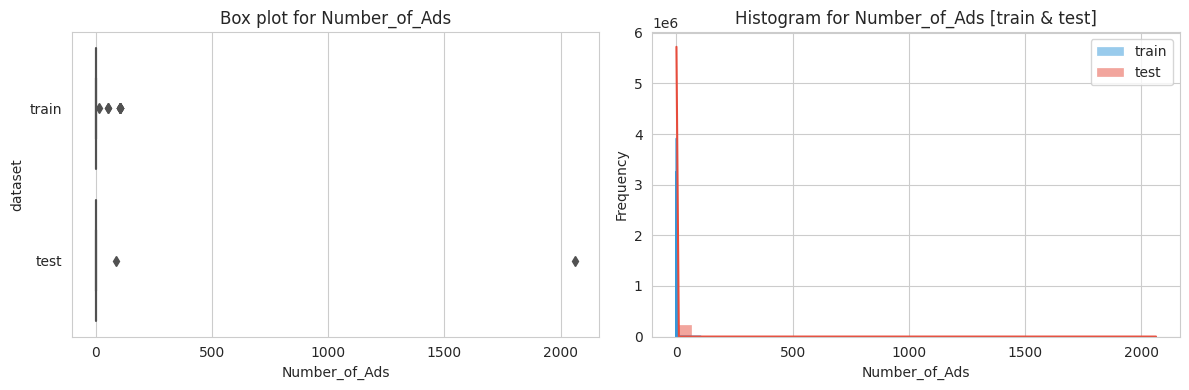

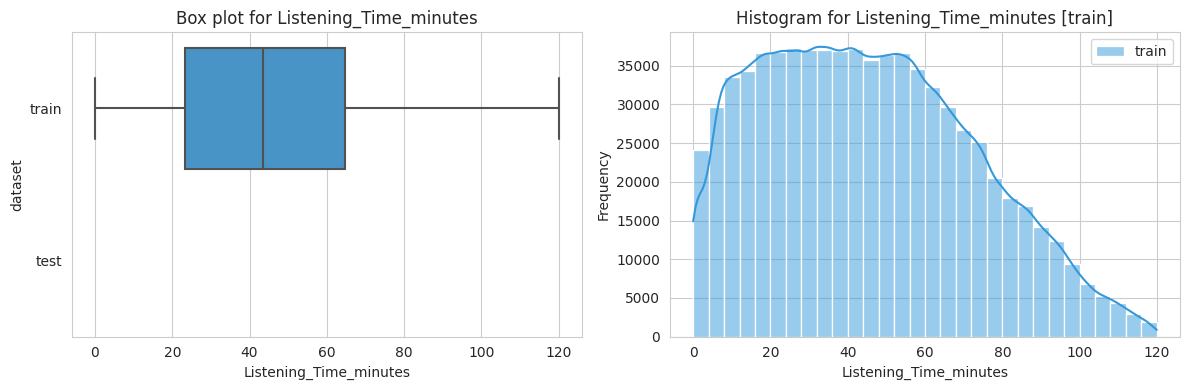

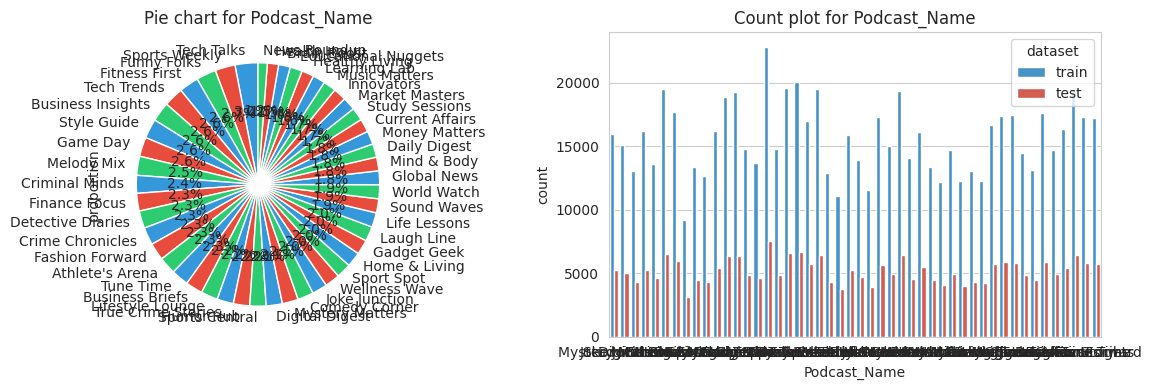

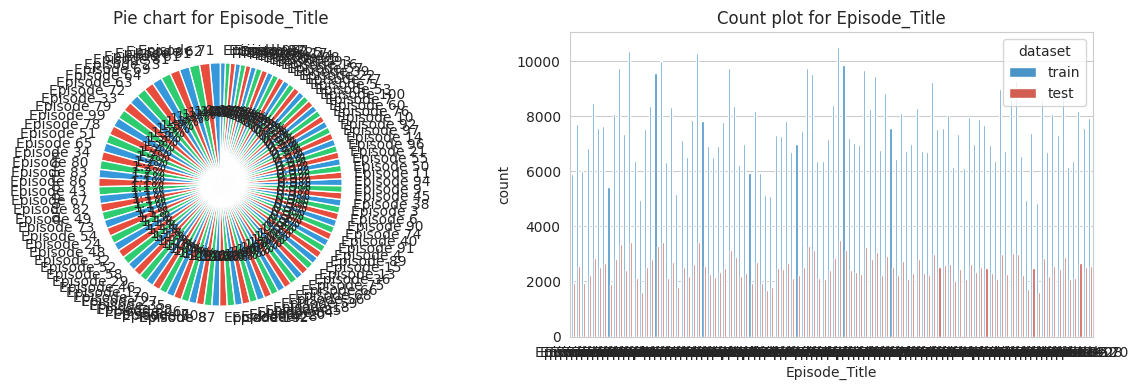

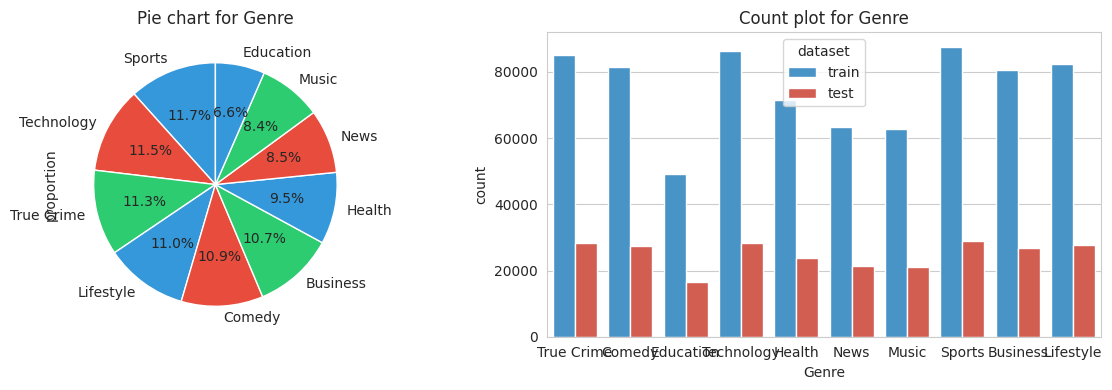

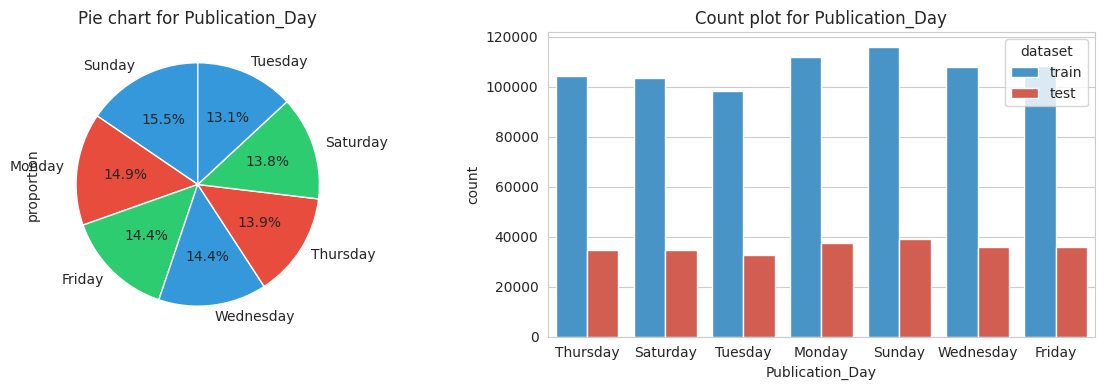

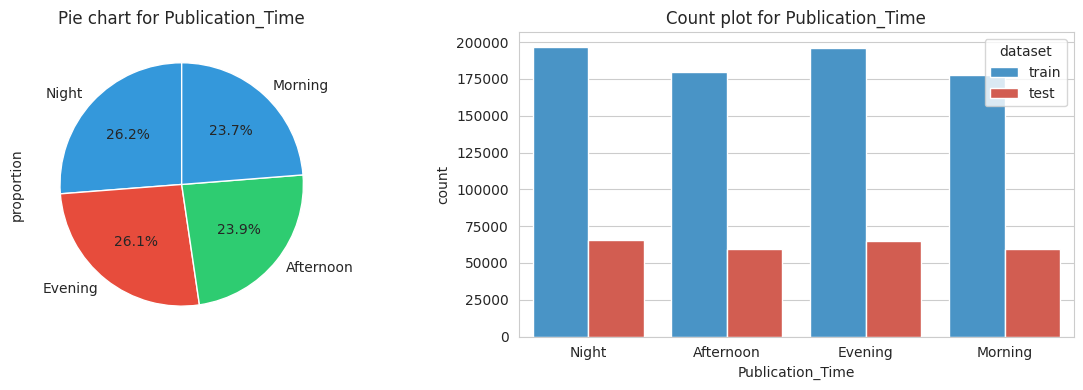

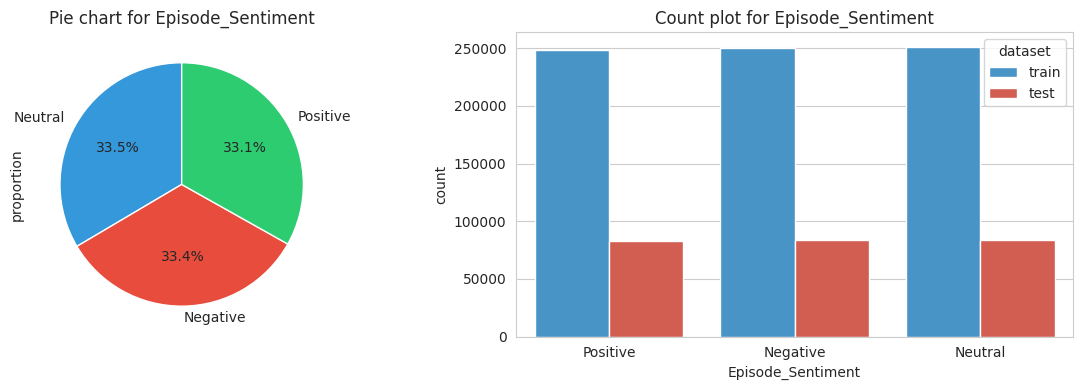

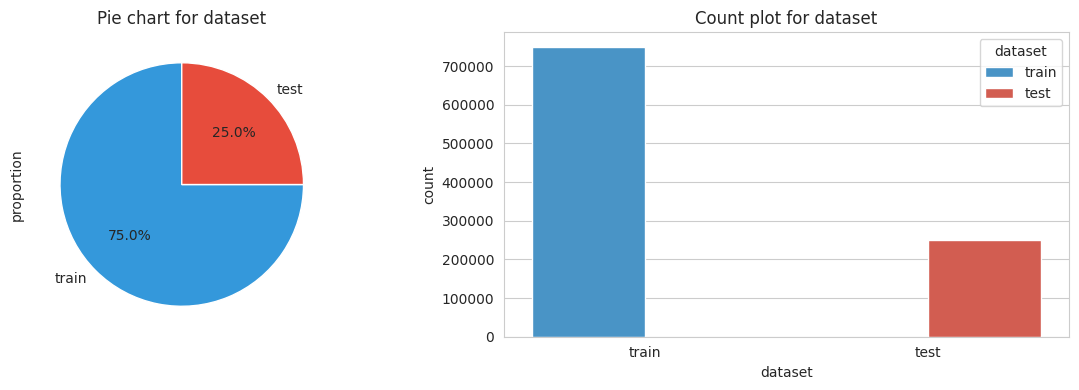

In [12]:
# EDA for both of numeric and category
# custom palette of colors
custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# Add 'Dataset' column to distinguish between train and test data
df_train['dataset'] = 'train'
df_test['dataset'] = 'test'

# Create a list of variables (both numerical and categorical data)
numerical_variables = df_train.select_dtypes(include=['number']).columns
categorical_variables = df_train.select_dtypes(include=['object']).columns

# A function to create plots for each variable
def create_variable_plots(variable, data_type='numerical'):
    sns.set_style('whitegrid')
    
    # For numeric data
    if data_type == 'numerical':
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(data=pd.concat([df_train, df_test]), x=variable, y="dataset", palette=custom_palette)
        plt.xlabel(variable)
        plt.title(f"Box plot for {variable}")

        # histgram
        plt.subplot(1, 2, 2)
        sns.histplot(data=df_train, x=variable, color=custom_palette[0], kde=True, bins=30, label="train")
        if variable in df_test.columns:
            sns.histplot(data=df_test, x=variable, color=custom_palette[1], kde=True, bins=30, label="test")
        
        plt.xlabel(variable)
        plt.ylabel("Frequency")
        plt.title(f"Histogram for {variable} [train & test]" if variable in df_test.columns else f"Histogram for {variable} [train]")
        plt.legend()

    # For categorical data
    elif data_type == 'categorical':
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # pie chart
        plt.subplot(1, 2, 1)
        gender_counts = pd.concat([df_train[variable], df_test[variable]]).value_counts(normalize=True)
        gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=custom_palette, startangle=90, ax=plt.gca())
        plt.title(f"Pie chart for {variable}")

        # countplat
        plt.subplot(1, 2, 2)
        sns.countplot(data=pd.concat([df_train, df_test]), x=variable, hue="dataset", palette=custom_palette)
        plt.title(f"Count plot for {variable}")

    plt.tight_layout()
    plt.show()

# Create plots for numerical data
for variable in numerical_variables:
    create_variable_plots(variable, data_type='numerical')

# Create plots for categorical data
for variable in categorical_variables:
    create_variable_plots(variable, data_type='categorical')


# Vivariate

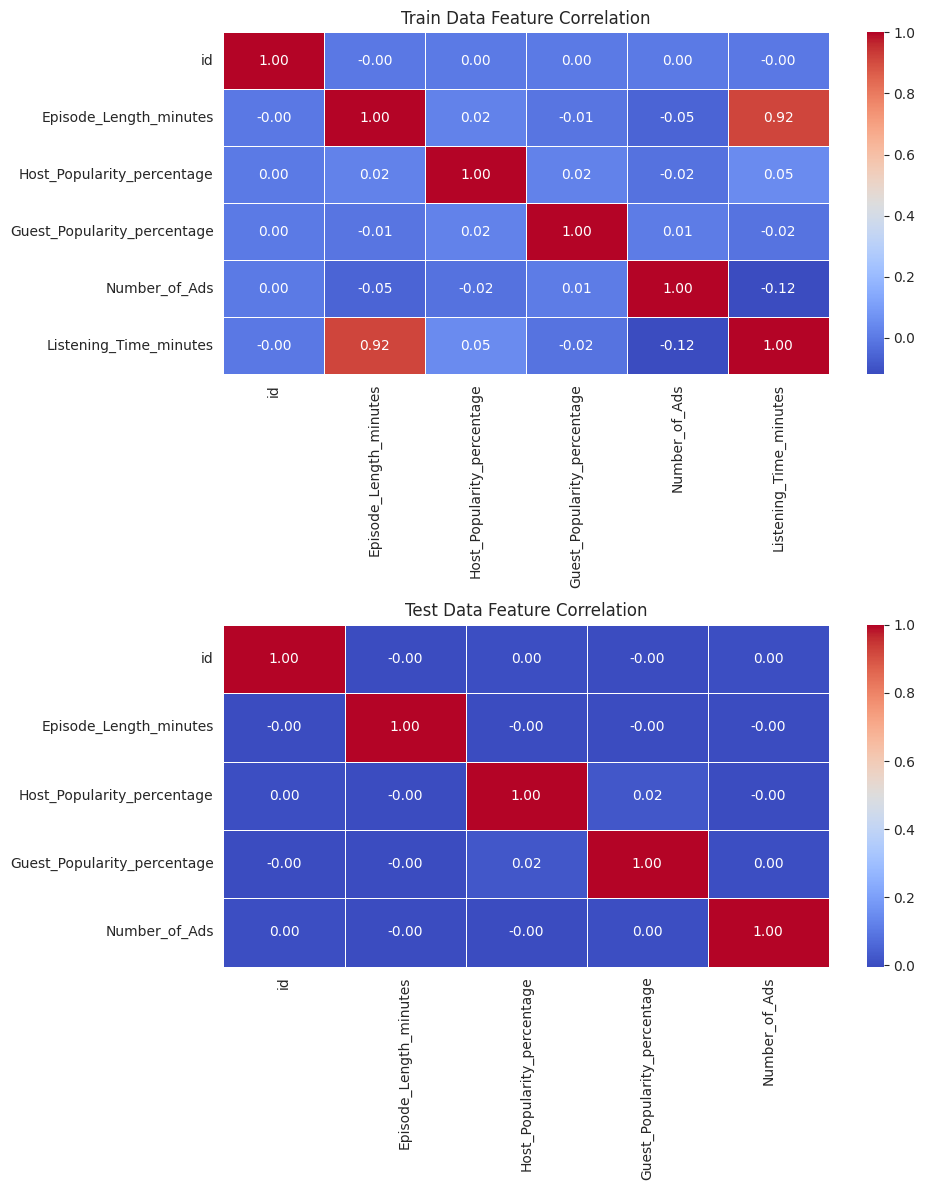

In [13]:
# Create a subplot (1 column, 2 rows)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

numerical_variables_tmp = ['id', 'Episode_Length_minutes', 'Host_Popularity_percentage','Guest_Popularity_percentage', 'Number_of_Ads']

# Correlation matrix of df_train
# (if necessary, extract only highly correlated variables.ex：mask=(corr < 0.8)))
sns.heatmap(df_train[numerical_variables].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Train Data Feature Correlation')

# # Correlation matrix of df_test
# (if necessary, extract only highly correlated variables.ex：mask=(corr < 0.8)))
sns.heatmap(df_test[numerical_variables_tmp].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Test Data Feature Correlation')

# Layout adjustment
plt.tight_layout()
plt.show()

In [14]:
# # making pairplot
# print('Pairplot of Train Data')
# sns.pairplot(df_train[numerical_variables])
# plt.show()

# print('------------------------------------------------------------------------------------------------------')

# print('Pairplot of Test Data')
# sns.pairplot(df_test[numerical_variables_tmp])
# plt.show()

# Relationship Between target variable and other variables

In [15]:
df_train.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes', 'dataset'],
      dtype='object')

In [16]:
RMV = df_train.select_dtypes(include=['number']).columns.tolist()
FEATURES = [c for c in list( df_train.columns ) if not c in RMV]
print(f"We have {len(FEATURES)} basic features:")
print( FEATURES )

We have 7 basic features:
['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment', 'dataset']


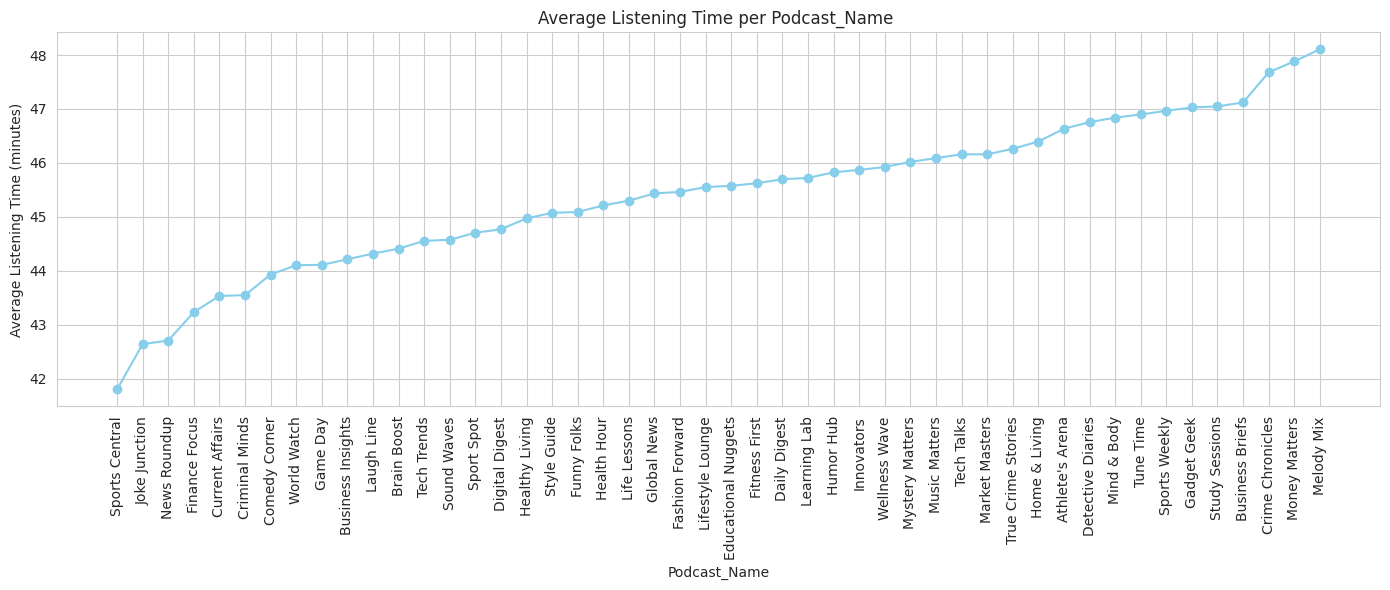

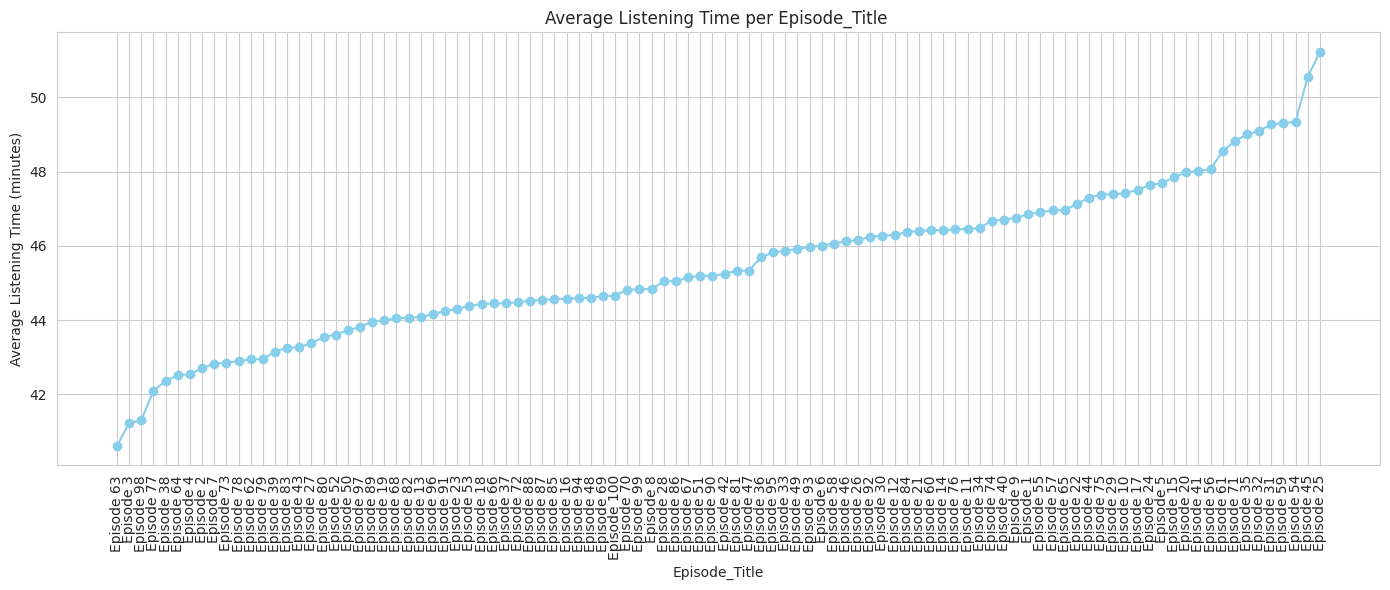

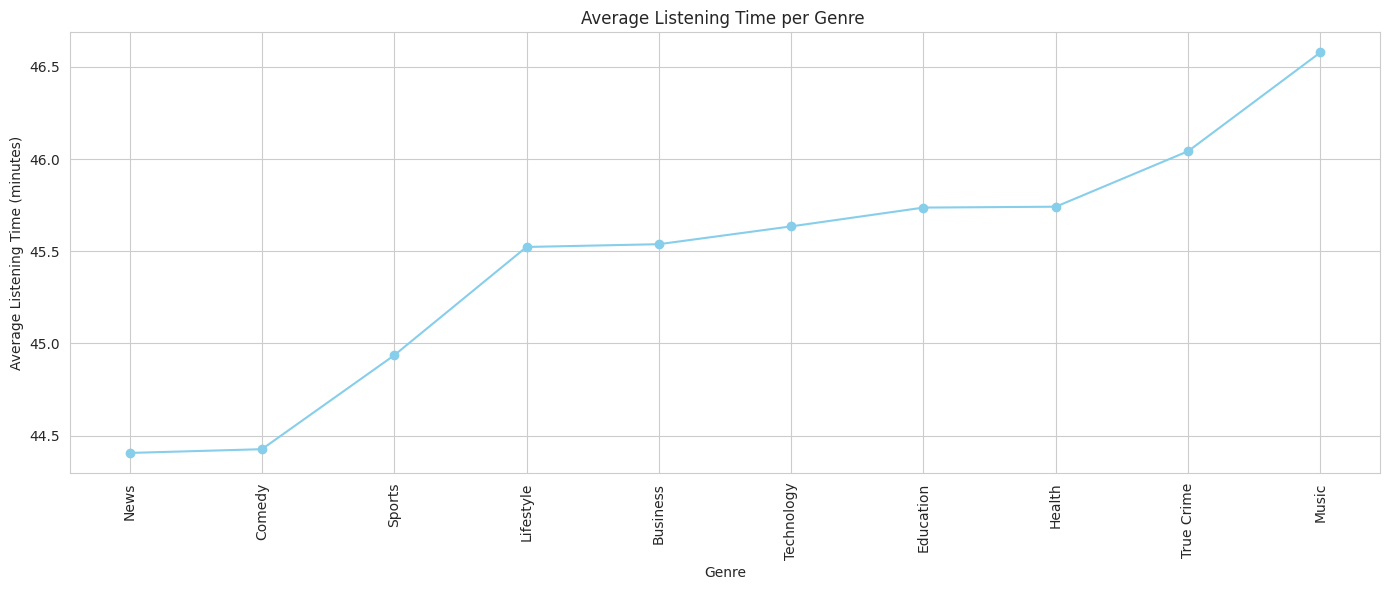

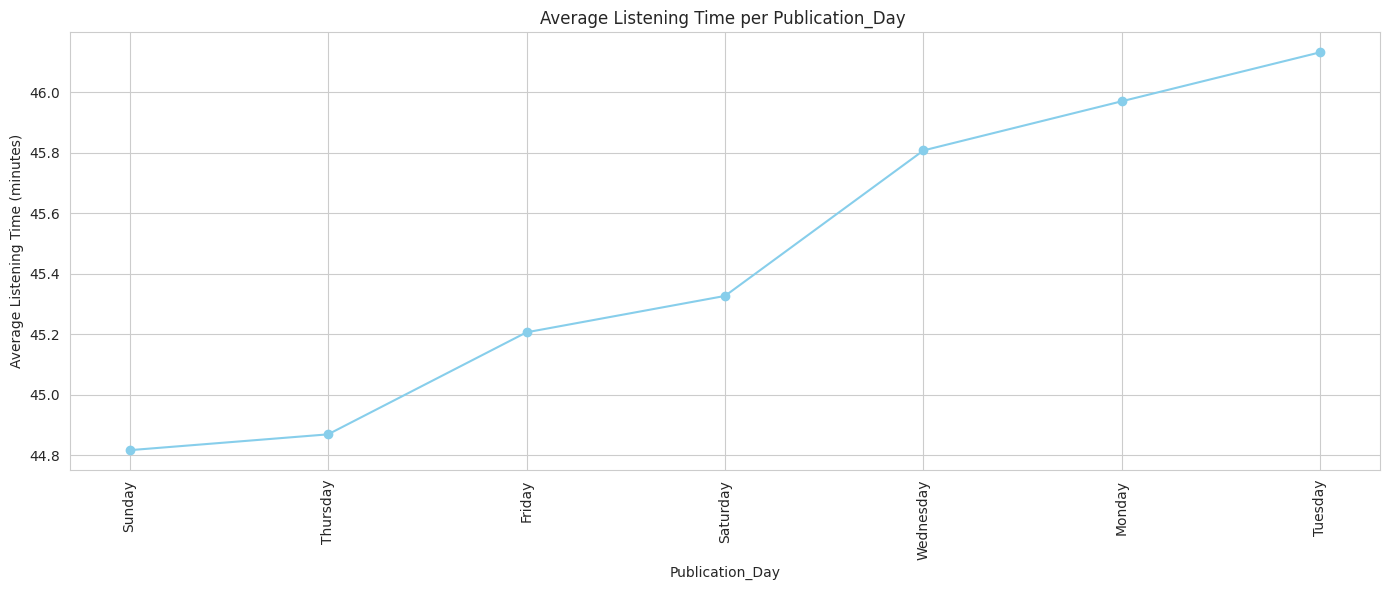

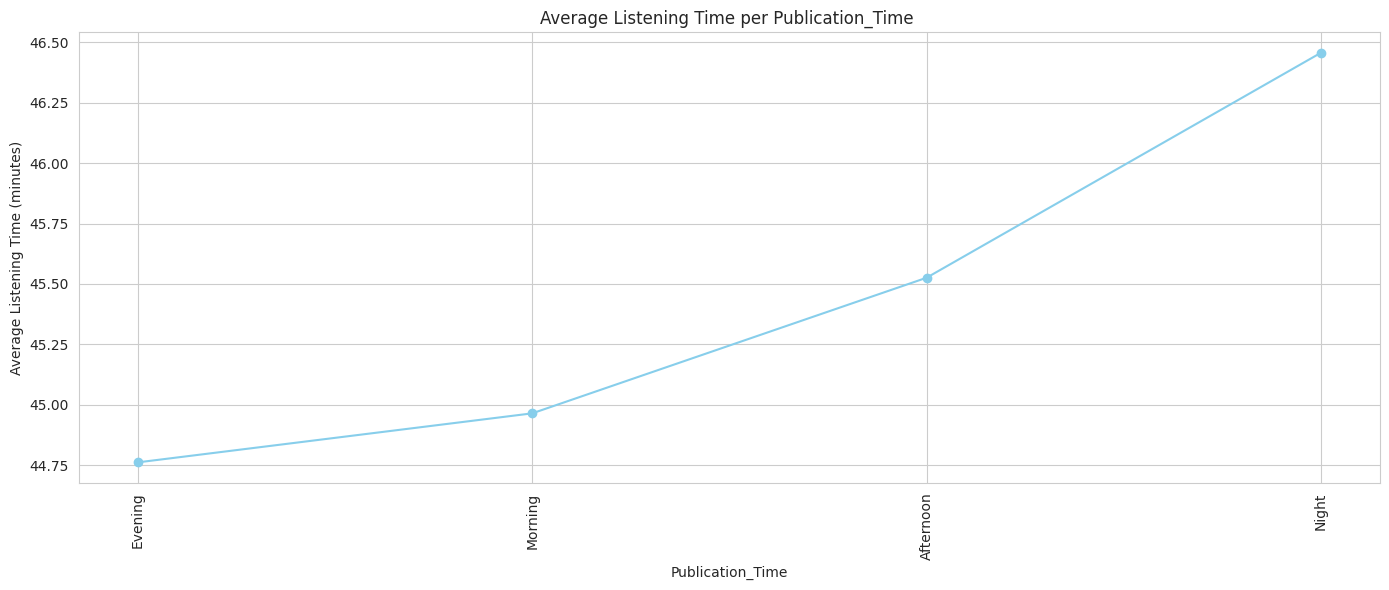

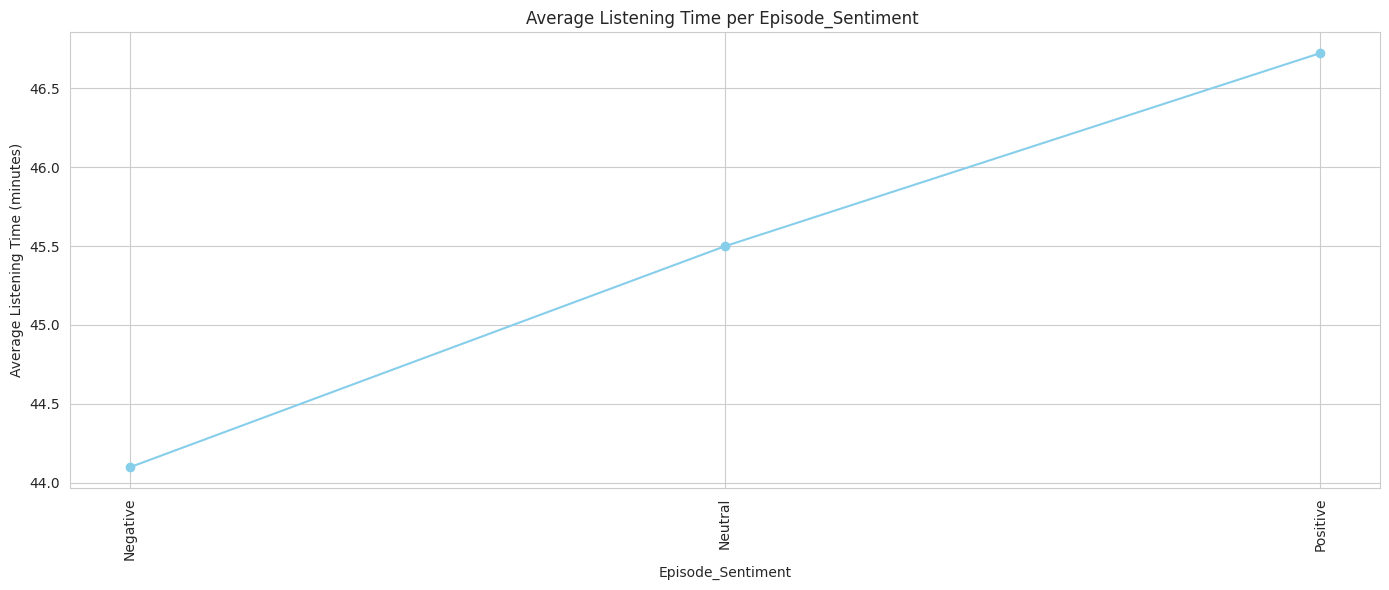

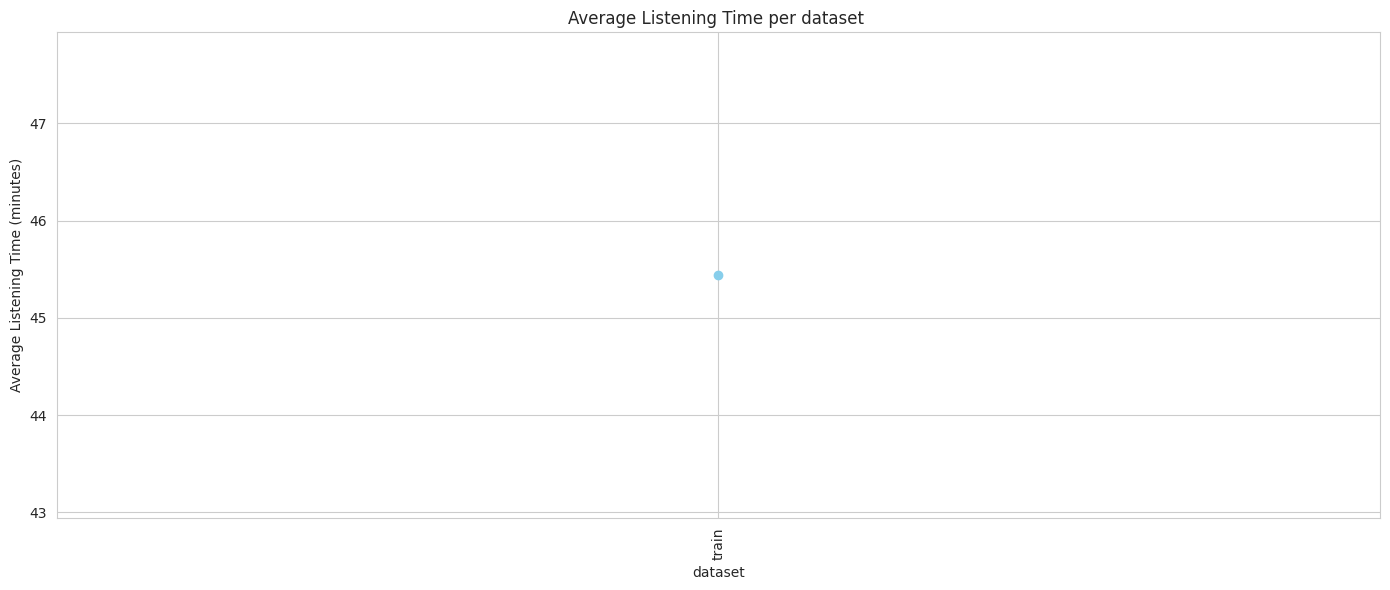

In [17]:
for feature in FEATURES:
    plt.figure(figsize=(14, 6))
    avg_listening = df_train.groupby(feature)['Listening_Time_minutes'].mean().sort_values()
    plt.plot(avg_listening.index, avg_listening.values, marker='o', linestyle='-', color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Average Listening Time (minutes)')
    plt.title(f'Average Listening Time per {feature} ')
    plt.xticks(rotation=90, ha='center')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Crosstab

In [18]:
df_train['Episode_Number_str'] = df_train['Episode_Title'].str.split(' ').str[1]            # Split a string on spaces and extract the second element
df_train['Episode_Number'] = pd.to_numeric(df_train['Episode_Number_str'], errors='coerce') # Convert to a number (adding error handling makes it safer)

del df_train['Episode_Number_str']

## Podcast_Name

In [19]:
cross_table = pd.crosstab(df_train['Podcast_Name'], df_train['Episode_Number'])    # Create a cross-tabulation table
styled_columns = cross_table.columns                                               # Specify the column you want to color (no need to specify if you want to color all columns)
styled_cross_table = cross_table.style.background_gradient(cmap='viridis', subset=pd.IndexSlice[:, styled_columns]) # Apply a gradient background color
display(styled_cross_table)

# Calculate the percentage across the row
row_totals = cross_table.sum(axis=1)
row_percentages = cross_table.div(row_totals, axis=0)

# Percentage crosstabs with styles applied
styled_row_percentages = row_percentages.style.background_gradient(cmap='viridis')
display(styled_row_percentages)

Episode_Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
Podcast_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Athlete's Arena,123,78,135,178,114,145,199,173,197,207,156,180,168,130,233,154,96,205,190,147,131,147,251,214,129,198,239,176,203,245,273,207,266,188,191,142,71,109,145,153,101,122,186,139,146,147,175,148,222,153,302,138,166,266,163,219,128,178,158,131,268,301,277,221,256,173,201,206,143,164,228,200,190,179,187,133,114,189,208,221,251,190,129,202,137,199,147,150,128,125,161,93,108,115,95,148,167,114,201,134
Brain Boost,105,79,117,161,127,121,79,172,94,76,121,176,104,134,90,84,80,140,190,155,155,75,169,125,124,170,71,88,103,88,159,120,192,141,122,93,81,135,90,124,102,76,118,101,155,130,119,124,142,124,145,125,98,112,81,100,87,108,93,74,153,175,133,115,132,122,128,74,138,102,142,77,112,48,125,98,62,123,97,110,111,83,136,100,143,93,140,132,106,94,108,126,125,123,60,91,106,152,118,86
Business Briefs,126,138,202,140,148,155,108,186,127,110,173,152,144,133,146,116,110,181,167,164,215,141,233,181,118,178,208,171,236,192,259,155,171,216,162,187,144,147,114,166,97,212,159,107,163,222,143,177,218,134,206,149,134,130,150,185,134,175,174,143,227,253,125,206,166,177,183,167,242,153,251,243,193,137,161,122,174,236,206,208,214,231,169,182,151,258,197,177,171,185,193,151,126,146,96,178,157,133,206,129
Business Insights,160,171,221,147,170,214,171,218,163,141,177,141,167,120,164,121,128,157,168,161,202,144,246,171,104,185,185,197,235,181,325,144,225,276,145,217,126,177,138,160,121,237,190,164,196,188,170,202,259,159,268,191,150,162,172,220,122,244,235,186,287,271,199,304,227,225,234,201,377,178,278,290,246,165,170,153,204,254,242,213,316,261,238,192,169,243,247,215,223,148,204,136,143,163,123,177,174,149,210,132
Comedy Corner,134,94,173,131,117,124,113,160,132,124,155,150,152,121,147,117,100,125,125,130,141,139,261,143,129,143,214,152,205,191,172,203,219,170,179,164,113,156,182,140,138,148,217,180,152,170,137,175,184,142,208,141,119,164,139,147,142,148,124,146,223,181,200,157,211,140,147,140,172,176,210,218,152,123,140,176,151,194,258,239,230,167,187,182,156,196,203,180,103,150,146,143,119,126,111,106,115,88,273,177
Crime Chronicles,119,107,113,134,143,164,131,153,130,157,151,224,157,204,214,117,114,173,155,167,93,130,266,168,82,201,140,178,223,184,225,248,217,166,176,179,95,131,158,183,107,148,217,124,182,190,178,206,179,153,220,185,148,148,161,125,106,133,181,163,245,248,202,283,229,141,158,240,251,168,217,257,173,158,137,120,137,215,222,213,293,198,217,136,186,231,160,160,185,218,149,183,146,171,118,175,143,161,278,128
Criminal Minds,146,135,101,174,123,165,141,155,137,161,153,224,156,202,206,140,118,182,151,202,132,172,208,183,103,191,169,206,182,198,265,214,162,168,199,191,96,125,130,180,126,143,210,133,153,231,175,285,172,135,230,220,158,219,144,142,104,176,142,254,230,300,210,323,195,148,168,263,217,157,203,267,163,237,189,108,161,189,186,187,259,214,194,154,193,205,128,122,152,221,142,211,144,193,145,160,151,114,218,116
Current Affairs,90,95,110,121,103,115,133,116,148,110,127,97,144,122,121,84,110,104,157,154,105,123,164,140,68,118,112,167,139,127,163,111,148,126,132,130,77,102,129,133,81,111,105,59,93,142,121,132,102,89,189,148,94,149,112,110,127,137,133,144,173,240,177,172,150,140,150,172,225,154,200,186,152,189,141,113,119,172,215,133,147,148,144,158,105,131,127,99,114,110,153,155,117,159,74,94,93,77,176,131
Daily Digest,96,75,103,90,101,151,145,137,133,131,128,133,154,166,118,109,87,120,149,98,101,116,143,166,79,151,129,179,121,131,175,158,158,172,128,138,98,133,101,117,87,117,142,76,87,142,108,171,126,76,142,157,124,118,107,120,133,154,141,98,163,203,203,175,187,138,166,114,227,142,196,187,159,129,135,113,123,136,218,

Episode_Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
Podcast_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Athlete's Arena,0.007099,0.004502,0.007791,0.010273,0.006579,0.008368,0.011485,0.009984,0.011370,0.011947,0.009003,0.010388,0.009696,0.007503,0.013447,0.008888,0.005540,0.011831,0.010966,0.008484,0.007560,0.008484,0.014486,0.012351,0.007445,0.011427,0.013794,0.010158,0.011716,0.014140,0.015756,0.011947,0.015352,0.010850,0.011023,0.008195,0.004098,0.006291,0.008368,0.008830,0.005829,0.007041,0.010735,0.008022,0.008426,0.008484,0.010100,0.008542,0.012812,0.008830,0.017429,0.007964,0.009580,0.015352,0.009407,0.012639,0.007387,0.010273,0.009119,0.007560,0.015467,0.017372,0.015987,0.012755,0.014775,0.009984,0.011600,0.011889,0.008253,0.009465,0.013159,0.011543,0.010966,0.010331,0.010792,0.007676,0.006579,0.010908,0.012004,0.012755,0.014486,0.010966,0.007445,0.011658,0.007907,0.011485,0.008484,0.008657,0.007387,0.007214,0.009292,0.005367,0.006233,0.006637,0.005483,0.008542,0.009638,0.006579,0.011600,0.007734
Brain Boost,0.009096,0.006844,0.010136,0.013948,0.011002,0.010483,0.006844,0.014901,0.008143,0.006584,0.010483,0.015247,0.009010,0.011609,0.007797,0.007277,0.006931,0.012129,0.016460,0.013428,0.013428,0.006497,0.014641,0.010829,0.010742,0.014728,0.006151,0.007624,0.008923,0.007624,0.013775,0.010396,0.016633,0.012215,0.010569,0.008057,0.007017,0.011695,0.007797,0.010742,0.008837,0.006584,0.010223,0.008750,0.013428,0.011262,0.010309,0.010742,0.012302,0.010742,0.012562,0.010829,0.008490,0.009703,0.007017,0.008663,0.007537,0.009356,0.008057,0.006411,0.013255,0.015161,0.011522,0.009963,0.011436,0.010569,0.011089,0.006411,0.011955,0.008837,0.012302,0.006671,0.009703,0.004158,0.010829,0.008490,0.005371,0.010656,0.008403,0.009530,0.009616,0.007191,0.011782,0.008663,0.012388,0.008057,0.012129,0.011436,0.009183,0.008143,0.009356,0.010916,0.010829,0.010656,0.005198,0.007884,0.009183,0.013168,0.010223,0.007450
Business Briefs,0.007407,0.008112,0.011874,0.008229,0.008700,0.009111,0.006348,0.010933,0.007465,0.006466,0.010169,0.008935,0.008465,0.007818,0.008582,0.006819,0.006466,0.010640,0.009817,0.009640,0.012638,0.008288,0.013696,0.010640,0.006936,0.010463,0.012227,0.010052,0.013873,0.011286,0.015225,0.009111,0.010052,0.012697,0.009523,0.010992,0.008465,0.008641,0.006701,0.009758,0.005702,0.012462,0.009346,0.006290,0.009581,0.013050,0.008406,0.010404,0.012814,0.007877,0.012109,0.008759,0.007877,0.007642,0.008817,0.010875,0.007877,0.010287,0.010228,0.008406,0.013344,0.014872,0.007348,0.012109,0.009758,0.010404,0.010757,0.009817,0.014225,0.008994,0.014754,0.014284,0.011345,0.008053,0.009464,0.007171,0.010228,0.013873,0.012109,0.012227,0.012579,0.013579,0.009934,0.010698,0.008876,0.015166,0.011580,0.010404,0.010052,0.010875,0.011345,0.008876,0.007407,0.008582,0.005643,0.010463,0.009229,0.007818,0.012109,0.007583
Business Insights,0.008214,0.008778,0.011345,0.007546,0.008727,0.010986,0.008778,0.011191,0.008368,0.007238,0.009086,0.007238,0.008573,0.006160,0.008419,0.006211,0.006571,0.008060,0.008624,0.008265,0.010370,0.007392,0.012628,0.008778,0.005339,0.009497,0.009497,0.010113,0.012064,0.009292,0.016684,0.007392,0.011550,0.014168,0.007444,0.011140,0.006468,0.009086,0.007084,0.008214,0.006211,0.012166,0.009754,0.008419,0.010062,0.009651,0.008727,0.010370,0.013296,0.008162,0.013758,0.009805,0.007700,0.008316,0.008830,0.011294,0.006263,0.012526,0.012064,0.009548,0.014733,0.013912,0.010216,0.015606,0.011653,0.011550,0.012012,0.010318,0.019353,0.009138,0.014271,0.014887,0.012628,0.008470,0.008727,0.007854,0.010472,0.013039,0.012423,0.010934,0.016222,0.013398,0.012218,0.009856,0.008676,0.012474,0.012680,0.011037,0.011448,0.007598,0.010472

In [20]:
# Creating a cross-tabulation table
cross_table = pd.crosstab(df_train['Podcast_Name'], df_train['Genre'], dropna=False)

# Calculate the percentage across the row
row_totals = cross_table.sum(axis=1)
row_percentages = cross_table.div(row_totals, axis=0)

# Rename the percentage column and merge it back into the original crosstab table
percentage_cols = [f'{col} (%)' for col in row_percentages.columns]
row_percentages.columns = percentage_cols
combined_table = pd.concat([cross_table, row_percentages], axis=1)

# Apply styles (it would be better to apply them separately for count and percentage, but here we apply them together)
styled_combined_table = combined_table.style.background_gradient(cmap='viridis')
display(styled_combined_table)

,Business,Comedy,Education,Health,Lifestyle,Music,News,Sports,Technology,True Crime,Business (%),Comedy (%),Education (%),Health (%),Lifestyle (%),Music (%),News (%),Sports (%),Technology (%),True Crime (%)
Podcast_Name,,,,,,,,,,,,,,,,,,,,
Athlete's Arena,4,21,9,5,3,5,11,17256,5,8,0.000231,0.001212,0.000519,0.000289,0.000173,0.000289,0.000635,0.995902,0.000289,0.000462
Brain Boost,0,5,11504,5,1,6,3,2,14,3,0.000000,0.000433,0.996621,0.000433,0.000087,0.000520,0.000260,0.000173,0.001213,0.000260
Business Briefs,17004,2,0,1,0,0,0,2,3,0,0.999530,0.000118,0.000000,0.000059,0.000000,0.000000,0.000000,0.000118,0.000176,0.000000
Business Insights,19471,1,1,0,1,0,3,1,0,2,0.999538,0.000051,0.000051,0.000000,0.000051,0.000000,0.000154,0.000051,0.000000,0.000103
Comedy Corner,0,15924,0,0,1,1,1,0,0,0,0.000000,0.999812,0.000000,0.000000,0.000063,0.000063,0.000063,0.000000,0.000000,0.000000
Crime Chronicles,1,1,3,4,12,4,5,5,3,17336,0.000058,0.000058,0.000173,0.000230,0.000691,0.000230,0.000288,0.000288,0.000173,0.997813
Criminal Minds,4,4,7,1,6,3,7,5,1,17697,0.000226,0.000226,0.000395,0.000056,0.000338,0.000169,0.000395,0.000282,0.000056,0.997857
Current Affairs,6,8,0,2,1,6,13086,9,3,17,0.000457,0.000609,0.000000,0.000152,0.000076,0.000457,0.996042,0.000685,0.000228,0.001294
Daily Digest,2,5,0,4,4,1,13357,12,2,4,0.000149,0.000373,0.000000,0.000299,0.000299,0.000075,0.997461,0.000896,0.000149,0.000299


In [21]:
cross_table = pd.crosstab(df_train['Podcast_Name'], df_train['Episode_Sentiment'], dropna=False)

row_totals = cross_table.sum(axis=1)
row_percentages = cross_table.div(row_totals, axis=0)

percentage_cols = [f'{col} (%)' for col in row_percentages.columns]
row_percentages.columns = percentage_cols
combined_table = pd.concat([cross_table, row_percentages], axis=1)

styled_combined_table = combined_table.style.background_gradient(cmap='viridis')
display(styled_combined_table)

,Negative,Neutral,Positive,Negative (%),Neutral (%),Positive (%)
Podcast_Name,,,,,,
Athlete's Arena,5861,5637,5829,0.338258,0.325330,0.336411
Brain Boost,3782,3803,3958,0.327644,0.329464,0.342892
Business Briefs,5626,5602,5784,0.330708,0.329297,0.339995
Business Insights,6884,6207,6389,0.353388,0.318634,0.327977
Comedy Corner,5398,5194,5335,0.338921,0.326113,0.334966
Crime Chronicles,6257,5224,5893,0.360136,0.300679,0.339185
Criminal Minds,6267,5594,5874,0.353369,0.315421,0.331209
Current Affairs,4651,4279,4208,0.354011,0.325696,0.320292
Daily Digest,4530,4602,4259,0.338287,0.343664,0.318049


In [22]:
cross_table = pd.crosstab(df_train['Genre'], df_train['Publication_Time'], dropna=False)

row_totals = cross_table.sum(axis=1)
row_percentages = cross_table.div(row_totals, axis=0)

percentage_cols = [f'{col} (%)' for col in row_percentages.columns]
row_percentages.columns = percentage_cols
combined_table = pd.concat([cross_table, row_percentages], axis=1)

styled_combined_table = combined_table.style.background_gradient(cmap='viridis')
display(styled_combined_table)

,Afternoon,Evening,Morning,Night,Afternoon (%),Evening (%),Morning (%),Night (%)
Genre,,,,,,,,
Business,19764,20477,18975,21305,0.245451,0.254306,0.235653,0.264589
Comedy,19243,20826,19773,21611,0.236247,0.255681,0.242753,0.265319
Education,11835,12870,12039,12356,0.241039,0.262118,0.245193,0.251650
Health,16919,18559,17336,18602,0.236908,0.259872,0.242747,0.260474
Lifestyle,19422,21697,19451,21891,0.235530,0.263118,0.235881,0.265471
Music,14776,16397,14770,16800,0.235500,0.261336,0.235405,0.267759
News,15512,17403,14349,16121,0.244727,0.274560,0.226378,0.254335
Sports,21125,22512,20957,23012,0.241136,0.256969,0.239219,0.262676
Technology,20824,22293,20740,22399,0.241421,0.258452,0.240447,0.259680


In [23]:
cross_table = pd.crosstab(df_train['Genre'], df_train['Publication_Time'], dropna=False)

row_totals = cross_table.sum(axis=1)
row_percentages = cross_table.div(row_totals, axis=0)

percentage_cols = [f'{col} (%)' for col in row_percentages.columns]
row_percentages.columns = percentage_cols
combined_table = pd.concat([cross_table, row_percentages], axis=1)

styled_combined_table = combined_table.style.background_gradient(cmap='viridis')
display(styled_combined_table)

,Afternoon,Evening,Morning,Night,Afternoon (%),Evening (%),Morning (%),Night (%)
Genre,,,,,,,,
Business,19764,20477,18975,21305,0.245451,0.254306,0.235653,0.264589
Comedy,19243,20826,19773,21611,0.236247,0.255681,0.242753,0.265319
Education,11835,12870,12039,12356,0.241039,0.262118,0.245193,0.251650
Health,16919,18559,17336,18602,0.236908,0.259872,0.242747,0.260474
Lifestyle,19422,21697,19451,21891,0.235530,0.263118,0.235881,0.265471
Music,14776,16397,14770,16800,0.235500,0.261336,0.235405,0.267759
News,15512,17403,14349,16121,0.244727,0.274560,0.226378,0.254335
Sports,21125,22512,20957,23012,0.241136,0.256969,0.239219,0.262676
Technology,20824,22293,20740,22399,0.241421,0.258452,0.240447,0.259680


In [24]:
cross_table = pd.crosstab(df_train['Genre'], df_train['Episode_Sentiment'], dropna=False)

row_totals = cross_table.sum(axis=1)
row_percentages = cross_table.div(row_totals, axis=0)

percentage_cols = [f'{col} (%)' for col in row_percentages.columns]
row_percentages.columns = percentage_cols
combined_table = pd.concat([cross_table, row_percentages], axis=1)

styled_combined_table = combined_table.style.background_gradient(cmap='viridis')
display(styled_combined_table)

,Negative,Neutral,Positive,Negative (%),Neutral (%),Positive (%)
Genre,,,,,,
Business,27125,26803,26593,0.336869,0.332870,0.330262
Comedy,26932,27137,27384,0.330645,0.333161,0.336194
Education,16203,16227,16670,0.330000,0.330489,0.339511
Health,23944,24194,23278,0.335275,0.338776,0.325949
Lifestyle,26742,28397,27322,0.324299,0.344369,0.331332
Music,20678,21356,20709,0.329567,0.340373,0.330061
News,21917,21380,20088,0.345776,0.337304,0.316920
Sports,29442,29147,29017,0.336073,0.332706,0.331222
Technology,27894,29006,29356,0.323386,0.336278,0.340336


In [25]:
cross_table = pd.crosstab(df_train['Publication_Time'], df_train['Episode_Sentiment'], dropna=False)
row_totals = cross_table.sum(axis=1)
row_percentages = cross_table.div(row_totals, axis=0)

percentage_cols = [f'{col} (%)' for col in row_percentages.columns]
row_percentages.columns = percentage_cols
combined_table = pd.concat([cross_table, row_percentages], axis=1)

styled_combined_table = combined_table.style.background_gradient(cmap='viridis')
display(styled_combined_table)

,Negative,Neutral,Positive,Negative (%),Neutral (%),Positive (%)
Publication_Time,,,,,,
Afternoon,60182,60040,59238,0.335350,0.334559,0.330090
Evening,66799,66150,62829,0.341198,0.337883,0.320920
Morning,57879,59741,60293,0.325322,0.335788,0.338890
Night,65256,65360,66233,0.331503,0.332031,0.336466
